In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
x=df.iloc[:, 3:5].values

In [8]:
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

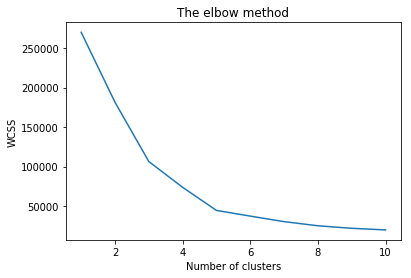

In [11]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#we can see 5 is appropriate number of clusters

In [12]:
#applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [14]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

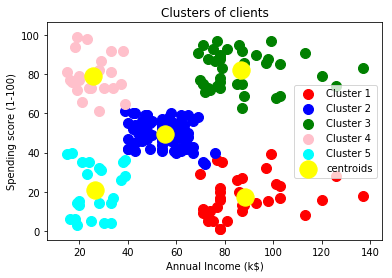

In [15]:
#plotting the clusters
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='pink', label='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='cyan', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()